# How to train the dataset?

In [1]:
# Lets first install hub
from IPython.display import clear_output
!pip install hub
clear_output()

In [2]:
# Import necessary packages
import hub
import torch
from torchvision import transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from matplotlib import pyplot as plt

In [3]:
ds_train = hub.load('/kaggle/input/food-recognition-2022/hub/train')
ds_val = hub.load('/kaggle/input/food-recognition-2022/hub/val')
ds_test = hub.load('/kaggle/input/food-recognition-2022/hub/test')

In [3]:
ds_train = hub.load('train')
ds_val = hub.load('val')
ds_test = hub.load('test')

train loaded successfully.
val loaded successfully.
test loaded successfully.


In [5]:
global class_labels;
class_labels = ds_train.categories.info.class_names

In [37]:
def transform(data):
    image, bboxes = data['images'], data['boxes']
    masks, categories = data['masks'], data['categories']
    
#     transform_img_mask = A.PadIfNeeded(512, 512, p=1)
#     image, masks = transform_img_mask(image=image, mask=masks)

    transform_all = A.Compose(
        [
            A.CenterCrop(512, 512),
            ToTensorV2(),
        ],
        bbox_params={
            'format':'coco', 
            'label_fields': ['class_labels']
        }
    )

    transformed = transform_all(
        image=image,
        mask=masks,
        bboxes=bboxes,
        class_labels=categories,
    )

    image = transformed['image']
    boxes = transformed['bboxes']
    masks = transformed['mask']
    categories = transformed['class_labels']
    
    return image, bboxes, masks, categories;

def collate_fn(batch):    
    return {
        "images" : torch.stack([x[0] for x in batch]), 
        "boxes" : [torch.tensor(x[1]) for x in batch],
        "masks" : [x[2] for x in batch],
        "categories" : [torch.tensor(x[3]) for x in batch]
    }

In [38]:
dataloader = ds_train.pytorch(num_workers = 0,
                        batch_size = 1,
                        transform = transform,
                        tensors = ['images', 'boxes', 'masks', 'categories'],
                        collate_fn = collate_fn,) 

for batch in dataloader:
    break;

ValueError: Requested crop size (512, 512) is larger than the image size (3, 426)

In [19]:
batch['images']

tensor([[[[ 70,  58,  57,  ..., 209, 214, 215],
          [ 67,  61,  58,  ..., 210, 213, 214],
          [ 73,  65,  57,  ..., 210, 212, 213],
          ...,
          [ 79,  81,  78,  ..., 105, 115, 127],
          [ 81,  83,  88,  ...,  97,  92, 108],
          [ 87,  87,  89,  ...,  92,  84,  97]],

         [[ 49,  37,  36,  ...,  99, 104, 105],
          [ 47,  40,  37,  ..., 100, 103, 104],
          [ 53,  45,  36,  ..., 100, 102, 103],
          ...,
          [ 28,  30,  27,  ...,  81,  91, 103],
          [ 19,  21,  26,  ...,  73,  68,  84],
          [ 15,  15,  20,  ...,  68,  60,  73]],

         [[ 58,  46,  43,  ..., 144, 149, 150],
          [ 56,  49,  46,  ..., 145, 148, 149],
          [ 62,  54,  45,  ..., 145, 147, 148],
          ...,
          [ 45,  47,  44,  ...,  79,  89, 101],
          [ 40,  42,  47,  ...,  71,  66,  82],
          [ 37,  37,  41,  ...,  66,  58,  71]]]], dtype=torch.uint8)

In [40]:
import cv2
import numpy as np

In [42]:
np.uint8(masks[0]).shape

(426, 1)

In [43]:
image.shape

(426, 426, 3)

In [105]:
index = 0
image = ds_train['images'][index].data()
masks = ds_train['masks'][index].numpy()
print(f"Original Shape : {image.shape}")

transform_img_mask = A.PadIfNeeded(
    1024, 1024,
    position=A.PadIfNeeded.PositionType.CENTER,
    border_mode=cv2.BORDER_CONSTANT,
    value=1,
    mask_value=1,
    p=1)

data = transform_img_mask(
    image=image, 
    mask=np.uint8(masks[0])
)

print(f"Transformed Shape : {data['image'].shape}")

Original Shape : (426, 426, 3)
Transformed Shape : (1024, 1024, 3)


In [106]:
masks[:,:,0].shape

(426, 426)

In [107]:
data['mask'].shape

(1024, 599)

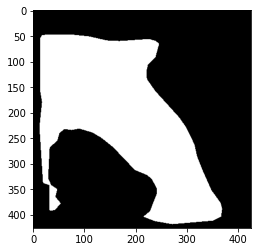

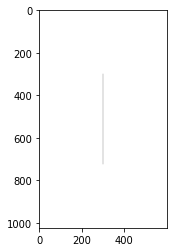

In [104]:
plt.imshow(masks[:,:,0], cmap='gray')
plt.show()
plt.imshow(data['mask'], cmap='gray')
plt.show()

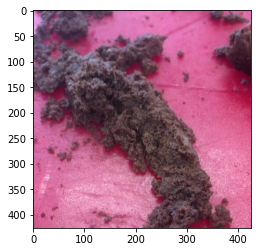

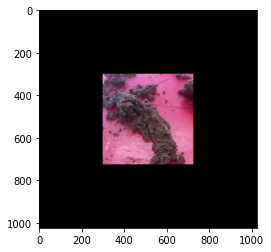

In [100]:
plt.imshow(image)
plt.show()
plt.imshow(data['image'])
plt.show()